#Analysis Challenge Assignment 3 

by **Pooja Addla**.

As a data scientist for the non-profit whose mission is to increase college graduation rates for underpriveleged populations, I was tasked with developing a more data-based approach to decision making for the organization.

For this, I have utilized the `CollegeScorecard.csv` dataset to cluster similar higher education institutions. 

In [22]:
#import basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#upload the required dataset

scorecard = pd.read_csv("CollegeScorecard.csv")
scorecard

C:\Users\pooja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


Since the `CollegeScorecard` dataset is extensive with 7804 rows × 1725 columns, I have made the informed choice to only include the following variables: **Institution name, City, State, Number of undergraduate students enrolled, Historically Black Colleges and Universities; Predominantly
Black Institutions; Alaska Native-/Native Hawaiian-serving
Institutions; Tribal Colleges and Universities; Asian
American-/Native American-Pacific Islander-serving Institutions;
Hispanic-serving Institutions; Native American Non-Tribal
Institutions, Men only instituitions, Women only instituitions, number of undergraduate students who are white/black/hispanic/asian/american indian/alaskan native/native hawaian/pacific islander/two or more races/non-resident alien/race unknown, number of first generation students, size of locality (big city vs town vs rural), retention rate and completition rates**

These variables are most useful for clustering to identify how to best help underserved populations based on socio-cultural factors.

In [24]:
# Select appropriate columns from the uploaded dataset
sel_columns = ["INSTNM", 
               "CITY", 
               "STABBR", 
               "UGDS", 
               "HBCU", 
               "PBI", 
               "ANNHI", 
               "TRIBAL", 
               "AANAPII", 
               "HSI", 
               "NANTI", 
               "MENONLY", 
               "WOMENONLY", 
               "UGDS_WHITE", 
               "UGDS_BLACK", 
               "UGDS_HISP", 
               "UGDS_ASIAN", 
               "UGDS_AIAN", 
               "UGDS_NHPI", 
               "UGDS_2MOR", 
               "UGDS_NRA", 
               "UGDS_UNKN",  
               "PAR_ED_PCT_1STGEN", 
               "LOCALE", 
               "RET_FT4",  
               "C150_4"]
scorecard_sel = scorecard[sel_columns]

In [25]:
#Replacing all missing values listed as'PrivacySuppressed' to null values

df = scorecard_sel.replace("PrivacySuppressed", np.nan)

In [26]:
#importing packages necessary for clustering and pca analysis

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [27]:
#dropping null values

df = df.dropna()
print(df.shape)

(2045, 26)


In [28]:
#function for clustered scatter plot and silhouette score visualization 
def cluster_analysis (data, num_b, von_1, von_2, score = True):
    kmeans_model = KMeans(n_clusters = num_b)
    kmeans_model.fit(data)
    data_kmeans = kmeans_model.predict(data)
    plt.scatter(data[:, von_1],
                data[:, von_2],
                c = data_kmeans,
                cmap = "viridis")
    plt.show()
    
    if score:
        visualizer = SilhouetteVisualizer(kmeans_model, colors = "viridis")
        visualizer.fit(data)
        visualizer.show()
        silhouetteScore = silhouette_score(data, data_kmeans, metric = "euclidean")
        print("Silhouette Score: {silhouetteScore}")

In [29]:
#Creating a PCA model by standardizing the data first

df_num = df.drop(["INSTNM", "CITY", "STABBR"], axis = 1)
std_df = preprocessing.scale(df_num) 
pca_scorecard = PCA(n_components = 23)
pca_scorecard.fit(std_df)

print(f"Principal components found: \n{pca_scorecard.components_}")
print(f"Explained variances: \n{pca_scorecard.explained_variance_}")

Principal components found: 
[[-1.37252536e-01  2.25335558e-01  6.72603403e-02 -2.54289723e-02
   8.34623029e-02 -3.48847639e-02  5.55481847e-02  5.77145941e-03
  -7.47076071e-03 -2.79764043e-02 -3.22484449e-01  3.51647458e-01
   9.10616054e-02 -2.22122588e-01  9.18206583e-02 -9.89873971e-03
  -1.73640673e-01 -2.33331697e-01  1.72612690e-01  4.04389615e-01
  -1.51283859e-02 -4.00209507e-01 -4.25376916e-01]
 [-1.65022862e-01 -1.20655870e-01 -2.66278500e-02 -8.20992874e-02
   4.02892511e-01 -1.51308420e-01 -1.98326831e-01  6.62602877e-02
   6.84516279e-02 -2.76095473e-02  3.68868710e-01 -1.46842521e-01
  -2.86572285e-01 -3.22702105e-01  4.16561755e-01 -1.12860244e-01
  -1.19490774e-01 -1.58312904e-01 -7.48159899e-02 -6.33286588e-02
   3.60930936e-01 -6.94860415e-02 -4.66376312e-02]
 [ 1.13477055e-01 -1.51841180e-01 -2.95628339e-02  1.64579173e-01
   4.87970556e-01  2.09697312e-01  2.10366018e-01  8.46380571e-02
  -7.91561014e-02 -2.54849654e-02 -2.88718661e-01 -1.80757585e-01
   2.700705

From the above, it's evident that the top 2 eigenvectors have explained variance >2. 

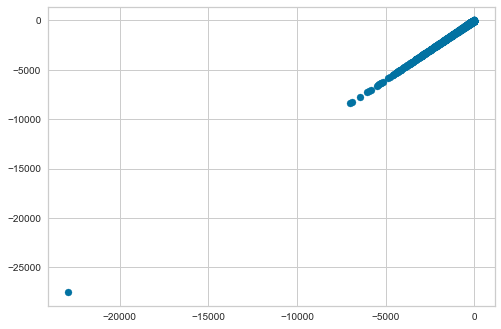

In [30]:
transf_df = pca_scorecard.transform(df_num)
plt.scatter(transf_df[:, 0], transf_df[:, 1]) #plotting scatterplot

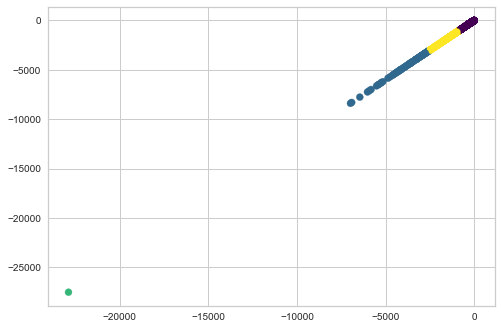

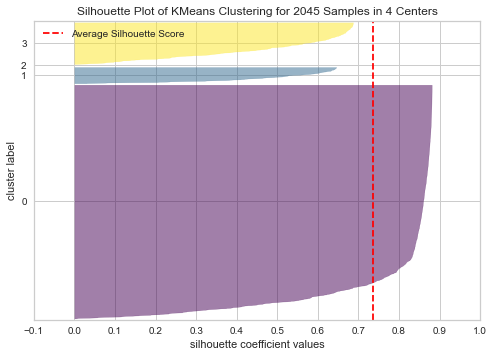

Silhouette Score: {silhouetteScore}


In [31]:
cluster_analysis(transf_df, 4, 0, 1)

For some reason, the silhouette score isn't being displayed above now but initially I got the following value: 0.7358252642869074 

Silhouette Score: 0.8076484601676929 for cluster_analysis(transf_df, 3, 0, 1)
Silhouette Score: 0.8142484072547187 for cluster_analysis(transf_df, 2, 0, 1)
Silhouette Score: 0.711362289045221 for cluster_analysis(transf_df, 5, 0, 1)
Silhouette Score: 0.6632444293959028 for cluster_analysis(transf_df, 6, 0, 1)

Eigenvectors 1 & 2


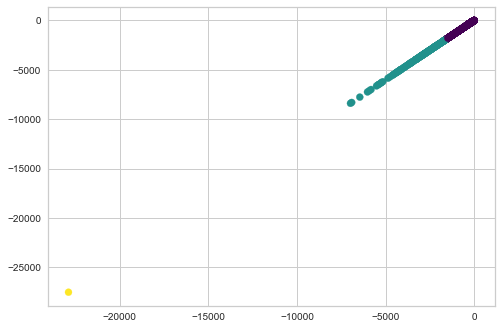

Eigenvectors 1 & 3


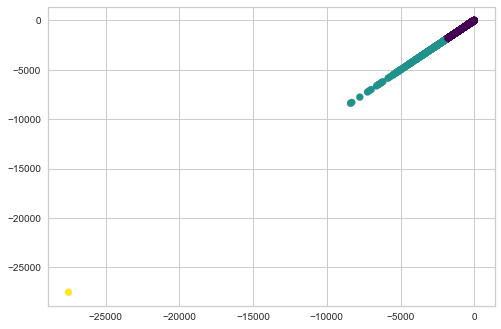

Eigenvectors 2 & 3


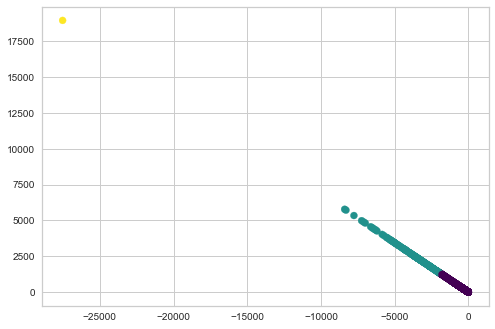

In [34]:
print("Eigenvectors 1 & 2")
cluster_analysis(transf_df, 3, 0, 1, score = False)

print("Eigenvectors 1 & 3")
cluster_analysis(transf_df, 3, 1, 1, score = False)

print("Eigenvectors 2 & 3")
cluster_analysis(transf_df, 3, 1, 2, score = False)

From this analysis, it appears that race, first-generation student status, and locality have high variance contributions. Interventions that target these attributes and are sensitive to their unique needs will be most efficient in increasing college graduation rates.